<div>
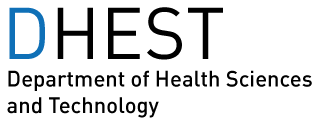
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQe1ZHapHvYNyrCLtdygLfLu92gN3ztZ64m9U8eNLeYE5BKY7r9wJiBgH7cnhZ7B269qw&usqp=CAU" width="300" align="left" style="display: inline;"/>
    <div ><h1 style="display: inline;"><br/>Foundations of Data Science </h1></div>
 </div>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go
import plotly.subplots as sp

import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
np.factorial(3)

AttributeError: module 'numpy' has no attribute 'factorial'

# Week 4: Statistics I 
## Explore Data Distributions

The aim of this tutorial is to familiarise yourself with different types of data distributions using visualisation techniques.

In this tutorial we will explore the characteristics of: 
1. Bernoulli distribution;
2. Binomial distribution;
3. Poisson distribution;
4. Normal distribution, and
5. Log-Normal distribution.

### Bernoulli Distribution
$Bernoulli$ distribution is used to model real-life examples.
The Bernoulli distribution is used to model the outcome of a single experiment that has two possible outcomes, 0 and 1. The classical example of Bernoulli trial is a coin toss.
- Random variable defined by the parameter $p$, $0 \leq p \leq 1$, which is the probability that the outcome is 1
- The probability mass function (PMF) of the Bernoulli distribution is:

\begin{equation}
    PMF_{br}\ (x, p) = p^x\cdot(1-p)^{1-x};  \text{         } \begin{array}{c}
{x= 0,1}\\{p\in [0,1]}
\end{array} 
\end{equation}

**[3 mins] Define python function to compute the Bernoulli probability mass function**

In [2]:
#Bernoulli probability mass function:
def bernoulli_pmf(x,p):
    """Bernoulli probability mass function.
    Parameters
    ----------
    x : int
        0 or 1
    p : float
        Probability of success (0 <= p <= 1)
    Returns
    -------
    P : float
        Probability of x
    """
    P = (p**x) * ( (1-p)**(1-x) )
    return P

**[1 min] Compute the probability of head when tossing a coin**
Define the likelihood p, and the X random variablePrint the result

In [3]:
 # Compute the probability of head when tossing a coin
X = 0   # Heads (0), Tails (1)
p = 0.5 # likelihood of heads (1/2)
print(f"The probability for getting heads(X={X}) is %.2f" % round(bernoulli_pmf(X, p), 2))

The probability for getting heads(X=0) is 0.50


**Simulating a coin toss experiment**

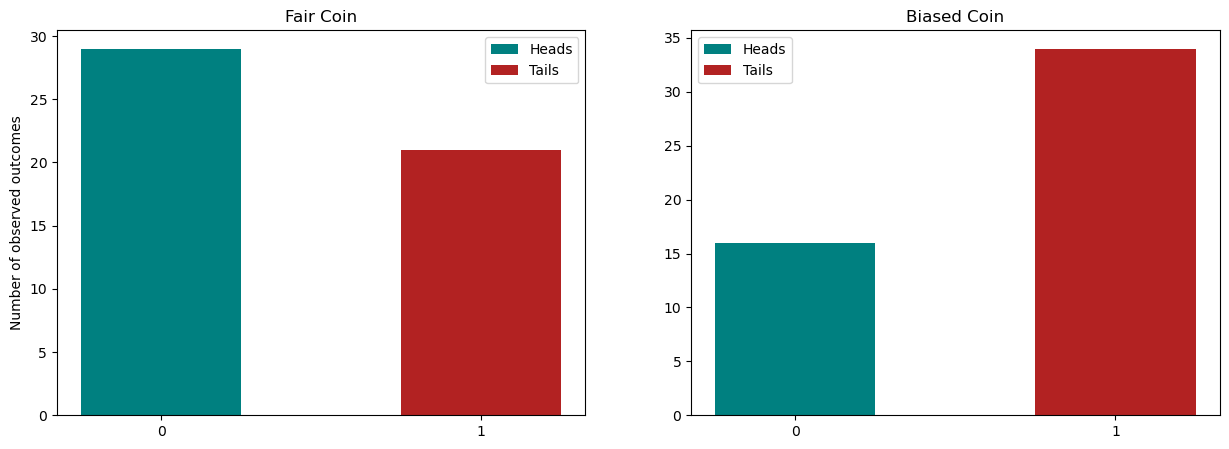

In [4]:
#Number of experiments
nr_experiments = 50

# Fair coin
p = 0.5
fair_coin_tosses = np.where(np.random.uniform(size=nr_experiments) > p, 1, 0)

# Biased coin
p = 0.3
biased_coin_tosses = np.where(np.random.uniform(size=nr_experiments) > p, 1, 0)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
b = plt.bar([0, 1], [sum(fair_coin_tosses == 0), sum(fair_coin_tosses == 1)], color=["teal", "firebrick"], width=0.5)
b[0].set_label("Heads")
b[1].set_label("Tails")
plt.xticks([0, 1])
plt.legend()
plt.title("Fair Coin")
plt.ylabel("Number of observed outcomes")

plt.subplot(1, 2, 2)
b = plt.bar([0, 1], [sum(biased_coin_tosses == 0), sum(biased_coin_tosses == 1)], color=["teal", "firebrick"], width=0.5)
b[0].set_label("Heads")
b[1].set_label("Tails")
plt.xticks([0, 1])
plt.title("Biased Coin")
plt.legend()

plt.show()

### Binomial Distribution

$Binomial$ distribution is a discrete probability distribution of $x$ successes in a sequence of $n$ Bernoulli trials, each with a probability of success $p$.
Let's consider an experiment consisting of $n$ Bernoulli trials $X1​,⋯,Xn$​ independent and with a constant probability $p$ of success. The probability mass function ($PMF$) of the Binomial distribution is:
\begin{equation}
  PMF_{bn}(x;n,p) = \binom{n}{x}p^x(1-p)^{n-x}, \text{   } x= 0,1, \cdots, n
\end{equation}

**[3 mins] Define a Binomial probability mass function**

In [5]:
# Binomial probability mass function
def binomial_pmf(x,n,p):
    """Binomial probability mass function.
    Parameters
    ----------
    x : int
        Number of successes
    n : int
        Number of trials
    p : float
        Probability of success (0 <= p <= 1)
    Returns
    -------
    P : float
        Probability of x
    """
    P = (math.factorial(n) / (math.factorial(x) * math.factorial(n-x))) * (p**x) * ( (1-p)**(n-x) )
    return P

**[1 min] Compute the probability of head when tossing a coin 3 consecutive times**
1. Define the probability p, and the n times of flipping the coin
2. Print the result 

In [6]:
X = 0   # Heads (0), Tails (1)
p = 0.5 # likelihood of heads (1/2)
n = 3   # Number of times of flipping the coin
x = n   # The number of times observing the value X
print(f"The probability for getting sequentially heads(X={X}) after flipping the coin {n} times is %.3f" % round(binomial_pmf(x,n,p), 3))


The probability for getting sequentially heads(X=0) after flipping the coin 3 times is 0.125


#### Binomial Distribution probabilities visualization 
We are going to compute the probabilities of having always heads as an outcome of coin flipping 10 times.
1. Define the parameters

In [7]:
X = 0
p = 0.5
n_exps = 10

**[3 min] Plot the probabilites of the binomial distribution**
1. Compute probability vector
2. Visualize as a standard scatter plot 
3. Add vertical lines at the probabilities (optional). use matplotlib function vlines

In [8]:
N = np.arange(1,n_exps+1)

probabilities = [binomial_pmf(n, n, p ) for n in N]

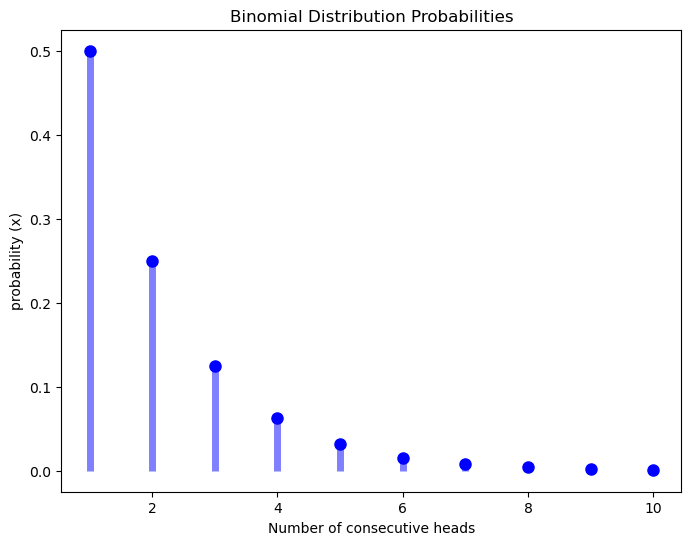

In [9]:
#plot the binomial distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Plot the probabilites as scatter points
ax.plot(N, probabilities, 'bo', ms=8, label='pmf')
# Add the vertical lines
plt.vlines(N, 0, probabilities, colors='b', lw=5, alpha=0.5)

plt.xlabel('Number of consecutive heads')
plt.ylabel('probability (x)')
plt.title('Binomial Distribution Probabilities')
plt.show()

### Poisson Distribution
$Poisson$ distribution describes the number of "events" given number of events occurring in a fixed interval of time and/or space if these events occur with a known constant rate and independently of the time since the last event.
A real example of poisson distribution can be the number of asthma patient arrivals in a given hour at a walk-in clinic.
- Lambda $(\lambda)$ is the mean number of events within a given interval of time or space
- A random variable $X \sim P(\lambda)$ distributed as a Poisson random variable Probability mass function is:
\begin{equation}
    P(X = x) = \frac{ e^{- \lambda} \lambda ^ {x}} {x!} \text{   } x=0,1,2, \cdots.
\end{equation}


**[2 mins] Define a Poisson probability mass function**

In [10]:
# Poisson probability mass function

def poisson_pmf(x, lam):
    """Poisson probability mass function.
    Parameters
    ----------
    x : int
        Number of events
    lam : float
        Mean number of events
    Returns
    -------
    P : float
        Probability of x
    """
    P = (np.exp(-lam) * lam**x) / np.math.factorial(x)
    return P

In [14]:
math.factorial(10)

3628800

#### [4 mins] Visualize the Poisson distribution of the number of asthma patient arrivals in a given hour at a walk-in clinic

The number of arrivals that are related to asthma (a respiratory problem ) at a "walk-in" clinic under "normal atmospheric conditions" is known to follow a Poisson Distribution with mean of 2.5 per 12-hour shift.

1. Define the parameters
2. Compute probability vector
3. Visualize as a standard scatter plot 
4. Add vertical lines at the probabilities (optional). use matplotlib function vlines


In [11]:
# The number of arrivals that are related to asthma (a respiratory problem ) at a "walk-in" clinic under "normal atmospheric conditions" is known to follow a Poisson Distribution with mean of 2.5 per 12-hour shift.
# Number of patiens
patients = [0, 1, 2, 3, 4, 5, 6, 7, 8] 
l = 2.5
poisson_probs = [poisson_pmf(x, l) for x in patients]

AttributeError: module 'numpy' has no attribute 'math'

NameError: name 'poisson_probs' is not defined

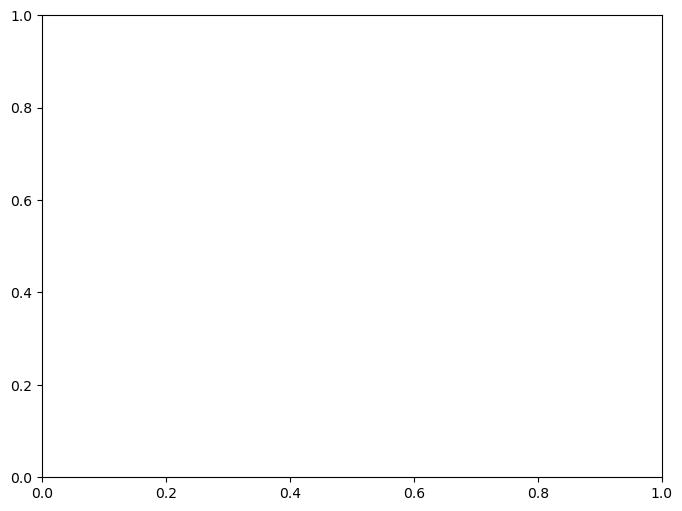

In [12]:
# Plot the probability distribution
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.plot(patients, poisson_probs, 'bo', ms=8, label='poisson pmf')

# generally a Poissan diagram is represented with vertical lines
ax.vlines(patients, 0, poisson_probs, colors='b', lw=5, alpha=0.5)

# Include a title and labels
plt.xlabel("X - Patiens")
plt.ylabel("Probability")
plt.title("Poisson Distribution")

### Normal distribution
The density function of the  $Normal$ distribution is also called the Gaussian distribution.  A real life example could be the height of people.  The random variable $X$ described by the PDF is a normal variable that follows $N( \mu, \sigma)$ :
\begin{equation}
    N(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \sigma } e ^{- \frac{(x - \mu) ^2}{2 \sigma ^2}}
\end{equation}
- with mean $\mu$, $\sigma$ is the standard deviation, hence $\sigma^2$ is its variance


**[2 mins] Define a Normal density function**

In [ ]:
# Define the normal distribution function
def normal_distribution(x, mu, sigma):
    """Normal distribution.
    Parameters
    ----------
    x : float
        Point
    mu : float
        Mean
    sigma : float
        Standard deviation
    Returns
    -------
    D : float
        distribution of x
    """
    exp_term = -0.5 * (1 / sigma * (x - mu)) ** 2
    D = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(exp_term)
    return D

#### [3mins] Visualize the height of a group of students

The heights of 80 students are normally distributed with a mean of 172cm and a standard deviation of 8cm.
1. Define the parameters
2. Compute x-axis and probabilities
3. Visualize the normalized continuous plot

In [ ]:
# import sys
# !{sys.executable} -m pip install scipy
from scipy.stats import norm
# Define the x-plot vector
n_students = 80
x = np.arange(1.30,2.10,0.01)
mean = 1.72
sd = 0.08
y_pdf = normal_distribution(x, mu = mean, sigma = sd)

NameError: name 'normal_distribution' is not defined

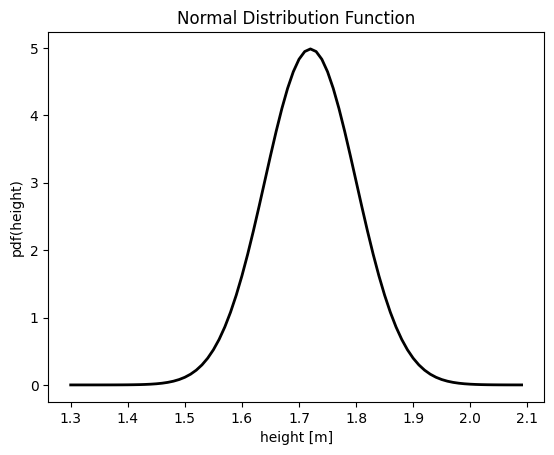

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y_pdf, color='black', lw=2)
plt.title('Normal Distribution Function')

# Set the labels
ax.set_xlabel('height [m]',fontsize=10)
ax.set_ylabel('pdf(height)', fontsize=10, rotation=90);

### Standard Normal Probability distribution

For computing the probability we do need to standarize the density function to:
\begin{equation}
    N(x; 0, 1) = \frac{1}{\sqrt{2 \pi}} e ^{- \frac{x ^2}{2}}
\end{equation}

For getting that kind of distribution a common practice is to use the z-score:

\begin{equation}
    z = \frac{x - \mu}{\sigma}
\end{equation}

**[2 mins] Define a Normal probability function**

In [ ]:
def normal_probability(z):
    """Normal distribution.
    Parameters
    ----------
    x : float
        Point
    mu : float
        Mean
    sigma : float
        Standard deviation
    Returns
    -------
    P : float
        Probability of x
    """
    P = (1 / (np.sqrt(2 * np.pi))) * np.exp(-0.5*z**2)
    return P

**[5 mins] Visualize the normalized standard deviation ** 
1. Apply the normalization to whole x-axis 
2. Plot the Normal Probability Distribution Function
3. Fill the area bellow the curve with gray color

In [ ]:
# Normalize the variables and compute the probabilities 
z = (x - mean)/sd
pdf = normal_probability(z)

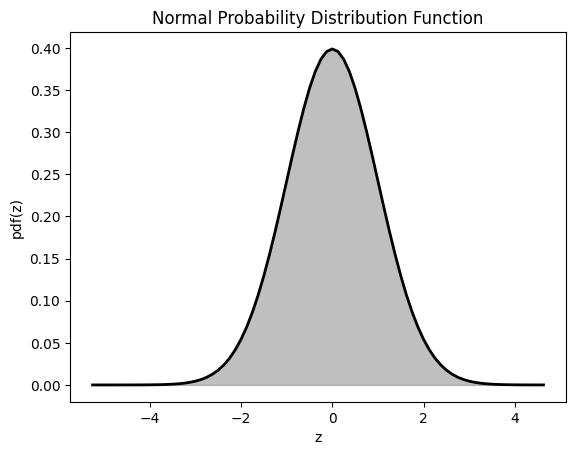

In [ ]:
# Plot the probability density function
fig, ax = plt.subplots()
ax.plot(z, pdf, color='black', lw=2)

# Fill the area under the curve 
plt.fill_between(z,pdf,0,color='gray',alpha=0.5)
#plt.plot(Z,Y, marker="o", markersize=7, markeredgecolor="red", markerfacecolor="red")
#ax.annotate(f"p({X})={round(Y, 3)}", (Z+0.01 ,Y+0.01), color='red')
plt.title('Normal Probability Distribution Function')

# Set the labels and title
ax.set_xlabel('z',fontsize=10)
ax.set_ylabel('pdf(z)', fontsize=10, rotation=90);

### Log normal Distribution
$Log-normal$ distribution is a right skewed continuous probability distribution. A real life example could be the length of latent periods of infectious disease. The log-normal $Y = ln(X) \sim N(\mu, \sigma^2)$ probability density function is defined by the mean $\mu$ and standard deviation $\sigma$:

\begin{equation}
    f(x) = \frac{1}{\sqrt{2\pi} \sigma x} e^{ - \frac{ (ln(x) - \mu)^2}{2 \sigma ^2}} \text{ for } x > 0
\end{equation}


**[2 mins] Define a log-normal density function**

In [ ]:
# Define the log-normal distribution function
def lognormal_distribution(x, mu, sigma):
    """Log-normal distribution.
    Parameters
    ----------
    x : float
        Point
    mu : float
        Mean
    sigma : float
        Standard deviation
    Returns
    -------
    P : float
        Probability of x
    """
    exp_term = -0.5 * (1 / sigma * (np.log(x) - mu)) ** 2
    P = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(exp_term)
    return P


**[5 mins] Plot the log-normal distribution functions for different $\mu$ and $\sigma$ parameters**

1. Create the x-vector from 0.01 to 8 
2. Create a figure with 2 subplots of size (14,7) 
    * (a) Plot the log-normal distribution with a fix $\mu$=1 for $\sigma \in [0.25, 0.5, 1, 1.5, 2]$
    * (b) Plot the log-normal distribution with a fix $\sigma$=0.5 for $\mu \in [0, 0.5, 1, 1.5, 2]$
3. Set the legend,axis and titles

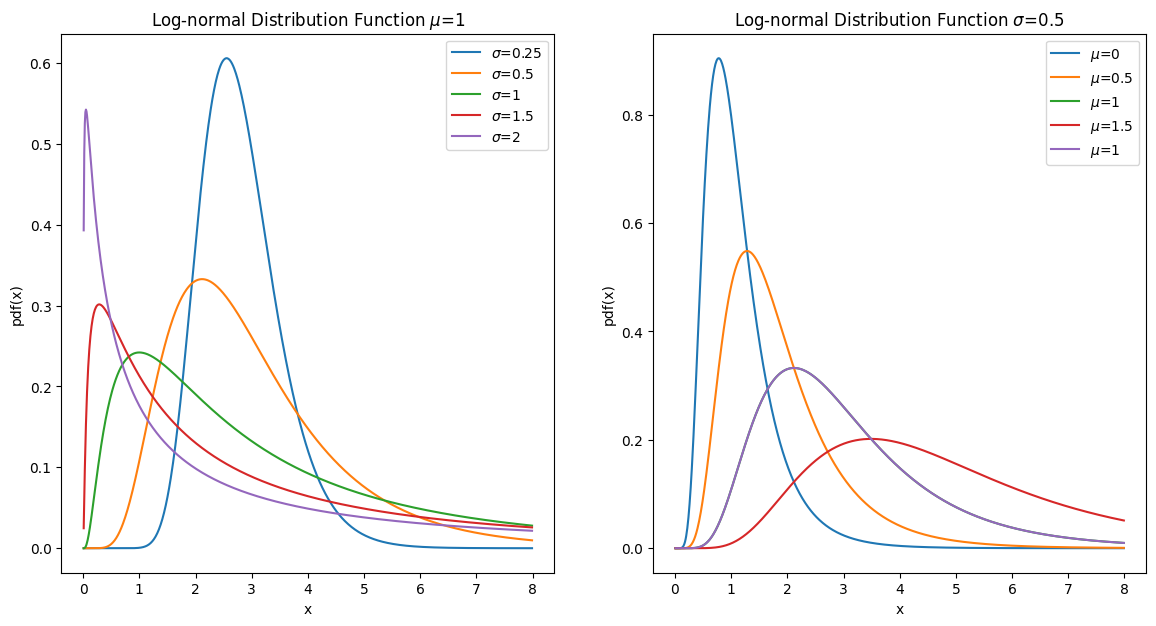

In [ ]:
# Plot the log-normal distribution function

# Define the x-plot vector
x = np.arange(0.01, 8, 0.01)


# Plot the probability density function
fig, ax = plt.subplots(1,2, figsize=(14,7))

# Define the mean and standard deviation
means = [0,0.5,1,1.5,1]
stds = [0.25, 0.5, 1,1.5, 2]

M = 1
for sigma in stds:
    y_pdf = lognormal_distribution(x, M, sigma)
    ax[0].plot(x, y_pdf, label=f'$\sigma$={sigma}')

S = 0.5

for mu in means:
    y_pdf = lognormal_distribution(x, mu, S)
    ax[1].plot(x, y_pdf, label=f'$\mu$={mu}')
    


# Set the labels and title
ax[0].set_title('Log-normal Distribution Function $\mu$=1')
ax[0].set_xlabel('x',fontsize=10)
ax[0].set_ylabel('pdf(x)', fontsize=10, rotation=90);
ax[0].legend()

ax[1].set_title('Log-normal Distribution Function $\sigma$=0.5')
ax[1].set_ylabel('pdf(x)', fontsize=10, rotation=90);
ax[1].set_xlabel('x',fontsize=10)
ax[1].legend();
plt.show()